# モーションコプロセッサ推定による歩数・移動距離を取得する

In [1]:
# 歩数センサ機能を使うためのモジュールを読み込む
from coremotion.cm_pedometer import *
import time

# 歩数情報を調べるためのPedometerクラスのインスタンスを作る
my_pedometer = Pedometer()

# 24時間/日 × 7日 にわたる歩数情報と移動距離情報を取得する
for i in range(24*7):
    fromDate =  NSDate.dateWithTimeIntervalSinceNow_(-60*60*(i+1))
    toDate = NSDate.dateWithTimeIntervalSinceNow_(-60*60*i)
    my_pedometer.query_pedometer_data_from_date_to_date(
        fromDate, toDate)
    time.sleep(1)

In [2]:
print(my_pedometer.pedometer_data)

[{'numberOfSteps': 0, 'distance': 0.0}, {'numberOfSteps': 0, 'distance': 0.0}, {'numberOfSteps': 16, 'distance': 11.0}, {'numberOfSteps': 0, 'distance': 0.0}, {'numberOfSteps': 0, 'distance': 0.0}, {'numberOfSteps': 0, 'distance': 0.0}, {'numberOfSteps': 0, 'distance': 0.0}, {'numberOfSteps': 0, 'distance': 0.0}, {'numberOfSteps': 0, 'distance': 0.0}, {'numberOfSteps': 0, 'distance': 0.0}, {'numberOfSteps': 0, 'distance': 0.0}, {'numberOfSteps': 0, 'distance': 0.0}, {'numberOfSteps': 0, 'distance': 0.0}, {'numberOfSteps': 0, 'distance': 0.0}, {'numberOfSteps': 0, 'distance': 0.0}, {'numberOfSteps': 0, 'distance': 0.0}, {'numberOfSteps': 0, 'distance': 0.0}, {'numberOfSteps': 0, 'distance': 0.0}, {'numberOfSteps': 0, 'distance': 0.0}, {'numberOfSteps': 0, 'distance': 0.0}, {'numberOfSteps': 9, 'distance': 3.509999990463257}, {'numberOfSteps': 0, 'distance': 0.0}, {'numberOfSteps': 0, 'distance': 0.0}, {'numberOfSteps': 0, 'distance': 0.0}, {'numberOfSteps': 0, 'distance': 0.0}, {'number

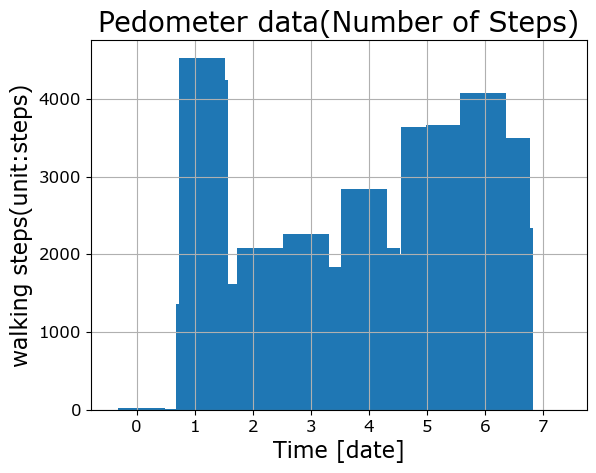

<Figure size 800x400 with 0 Axes>

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 横軸を作る（横軸は”日”単位）
t = np.arange(0., 7, 1/24)

# 必要文字数短縮のために変数に代入しておく
pedometer_data = my_pedometer.pedometer_data
# 歩数を棒グラフにする
steps = [data['numberOfSteps'] for data in pedometer_data]
# 歩数を棒グラフにする
plt.bar(t, steps)
# グラフの見た目を調整する
plt.title("Pedometer data(Number of Steps)", fontsize=20)
plt.xlabel('Time [date]', fontsize=16)
plt.ylabel('walking steps(unit:steps)', fontsize=16)
plt.tick_params(labelsize=12)
plt.grid()
plt.figure(figsize=[8,4])
plt.show()

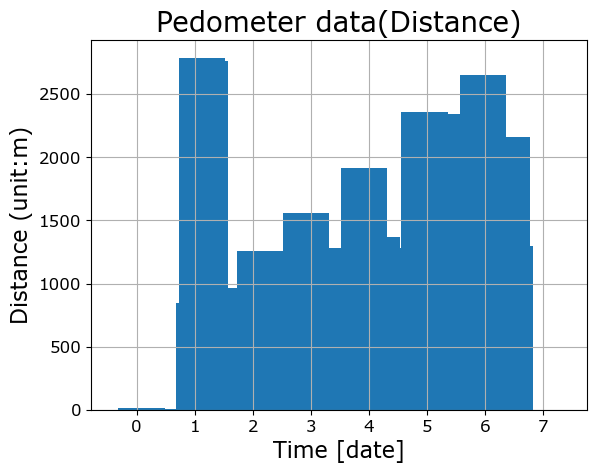

<Figure size 800x400 with 0 Axes>

In [5]:
# 移動した距離推移を棒グラフにする
distance = [data['distance'] for data in pedometer_data]
# 移動した距離推移を棒グラフにする
plt.bar(t, distance)
# グラフの見た目を調整する
plt.title("Pedometer data(Distance)", fontsize=20)
plt.xlabel('Time [date]', fontsize=16)
plt.ylabel('Distance (unit:m)', fontsize=16)
plt.tick_params(labelsize=12)
plt.grid()
plt.figure(figsize=[8,4])
plt.show()